In [4]:
import sys
sys.path.insert(0, 'src/')

from ucnnreco import CartesianScampi, NonCartesianScampi
from pathlib import Path
from utils.plot_utils import disp
from utils.params import RecoParams
import torch

Select the device:

In [5]:

if torch.cuda.is_available():
    device = torch.device('cuda:0')
    torch.cuda.set_device(device)
else:
    device = torch.device('cpu')


# Cartesian sampling:

Create and initialize a container for the reconstruction hyperparameters:

In [7]:
cartesian_params = RecoParams()
cartesian_params.from_json('src/config/CScampi.json')

print(cartesian_params)


name               : Cartesian-Scampi  
dtype              : float32  
learningrate       : 0.07  
batch_size         : 1  
skip_connections   : 1.0  
n_epochs           : 1000  
eta_k              : 20  
eta_img            : 10  
l_l1w              : 2.5e-08  
l_tv               : 0.0  


Instantiate and initialize the reconstruction object:

In [8]:
reco = CartesianScampi(recopars=cartesian_params, device=device)

A fully sampled k-space is given (ground trouth). 
Additionaly we need the sampling mask for downsampling (R=3) and the coilmaps:

In [9]:
reco.set_data_path(full_kspace_path=Path('data/cartesian/brain_209_6001331/file_brain_AXT2_209_6001331_1')
                    , mask_path=Path('data/cartesian/brain_209_6001331/sampling/gaussian_0.5_3'),
                    coilmap_path=Path(
                        'data/cartesian/brain_209_6001331/file_brain_AXT2_209_6001331_1_coilmap_highres'))

Load the data:

In [10]:
reco.prep_data()

Fully sampled kspace and mask is given: undersampled kspace data will be generated i.e. provided data for us_kspace will be ignored.


Instantiate and initialize the model:

In [11]:
reco.prep_model()

Provide a fully sampled reference image (ground trouth):

In [12]:
gt = reco.get_gt()

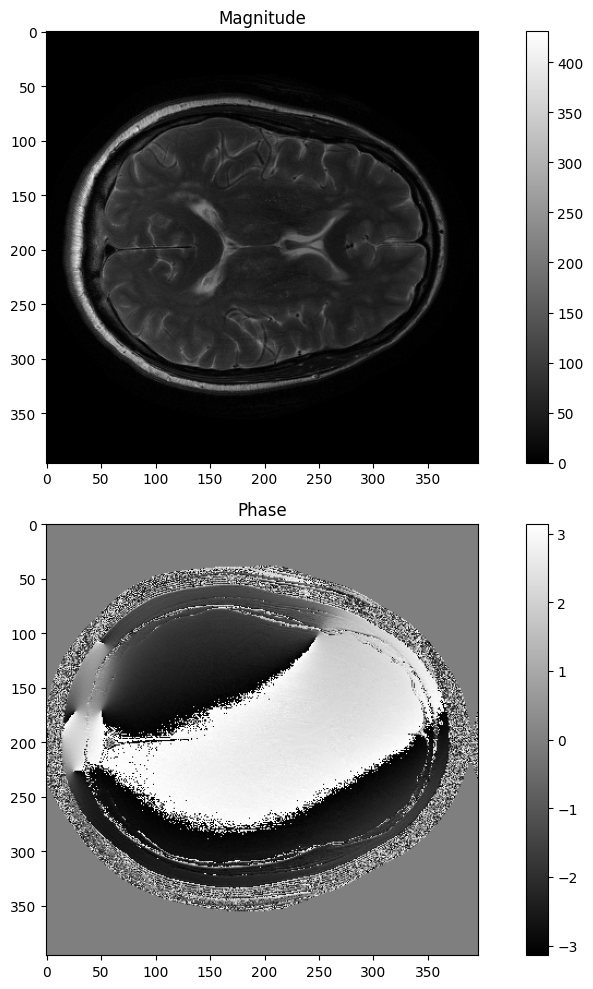

In [13]:
disp(gt)

Perform the reco (i.e. train the model):


In [48]:
res = reco()

  0%|          | 0/1000 [00:00<?, ?it/s]

Show the results:

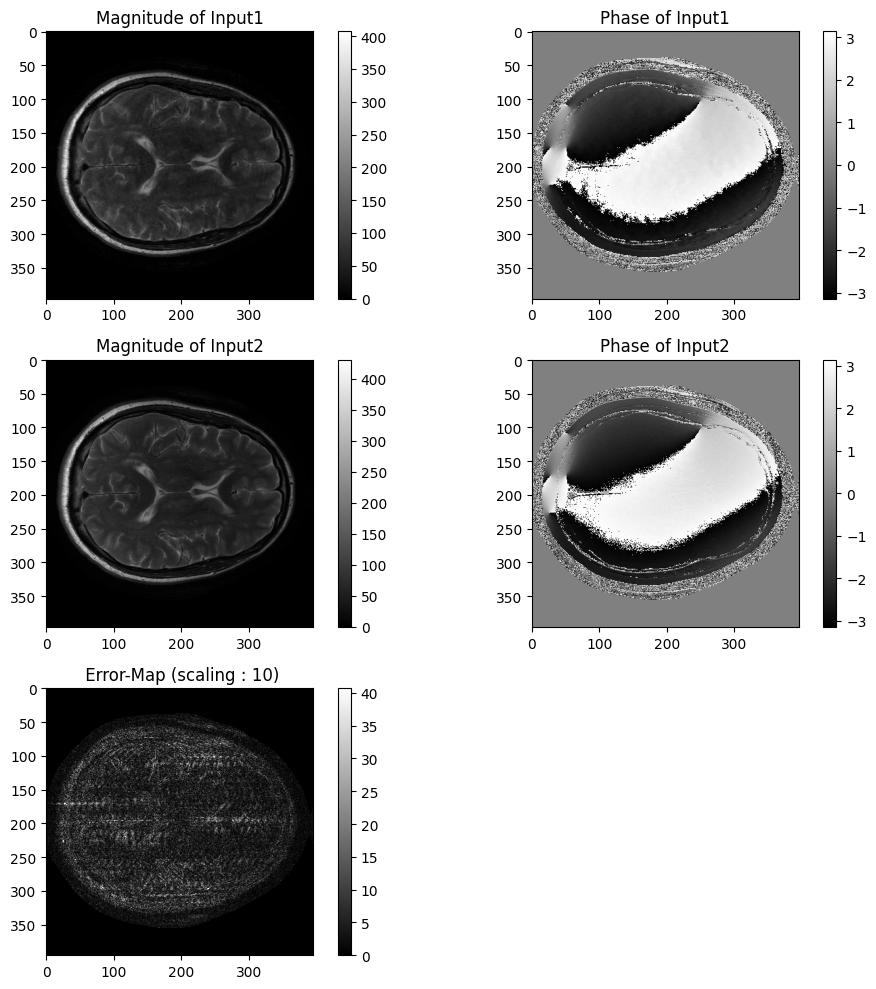

In [49]:
disp(res, gt, dims=(-1, -2), scale_error=10)